In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import os
from os.path import join as opj
import json
import seaborn as sns

In [2]:
experiment_folder = "/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/scene_predictor/experiments_13_mar_same_policy_1/2_obs/transformer"
files = os.listdir(experiment_folder)

In [3]:
inputs = []
seq_loss_mov_iou = []
seq_loss_static_iou = []

final_loss_mov_iou = []
final_loss_static_iou = []

for file in files:
    file_path = opj(experiment_folder, file)
    with open(file_path, 'r') as f:
        data = json.load(f)

    inputs.append(file.split('.')[0].split('_')[0])
    
    seq_loss = data['recorded_loss']['seq_loss']['iou']
    seq_loss_mov_iou.append(seq_loss['movable'])
    seq_loss_static_iou.append(seq_loss['static'])
    
    final_loss = data['recorded_loss']['final_loss']['iou']
    final_loss_mov_iou.append(final_loss['movable'])
    final_loss_static_iou.append(final_loss['static'])   

In [4]:
print('seq_loss_mov_iou:', seq_loss_mov_iou)
print('final_loss_mov_iou:', final_loss_mov_iou)
print('seq_loss_static_iou:', seq_loss_static_iou)
print('final_loss_static_iou:', final_loss_static_iou)

print('inputs', inputs)

seq_loss_mov_iou: [0.5086249873359576, 0.4278673024458745, 0.3778380303907056, 0.4755711444738001, 0.4264477169020913]
final_loss_mov_iou: [0.43881814637367816, 0.360816458179397, 0.3082648690304572, 0.39822979560907995, 0.34424597011172825]
seq_loss_static_iou: [0.35009518351420565, 0.3054598780089086, 0.29039242975841206, 0.3218705607962346, 0.32512429948466576]
final_loss_static_iou: [0.3862613313642603, 0.31962533974433793, 0.30290000349205554, 0.34151188653823256, 0.3371397506848756]
inputs ['qqdtaupose', 'qqdtau', 'q', 'taupose', 'qqd']


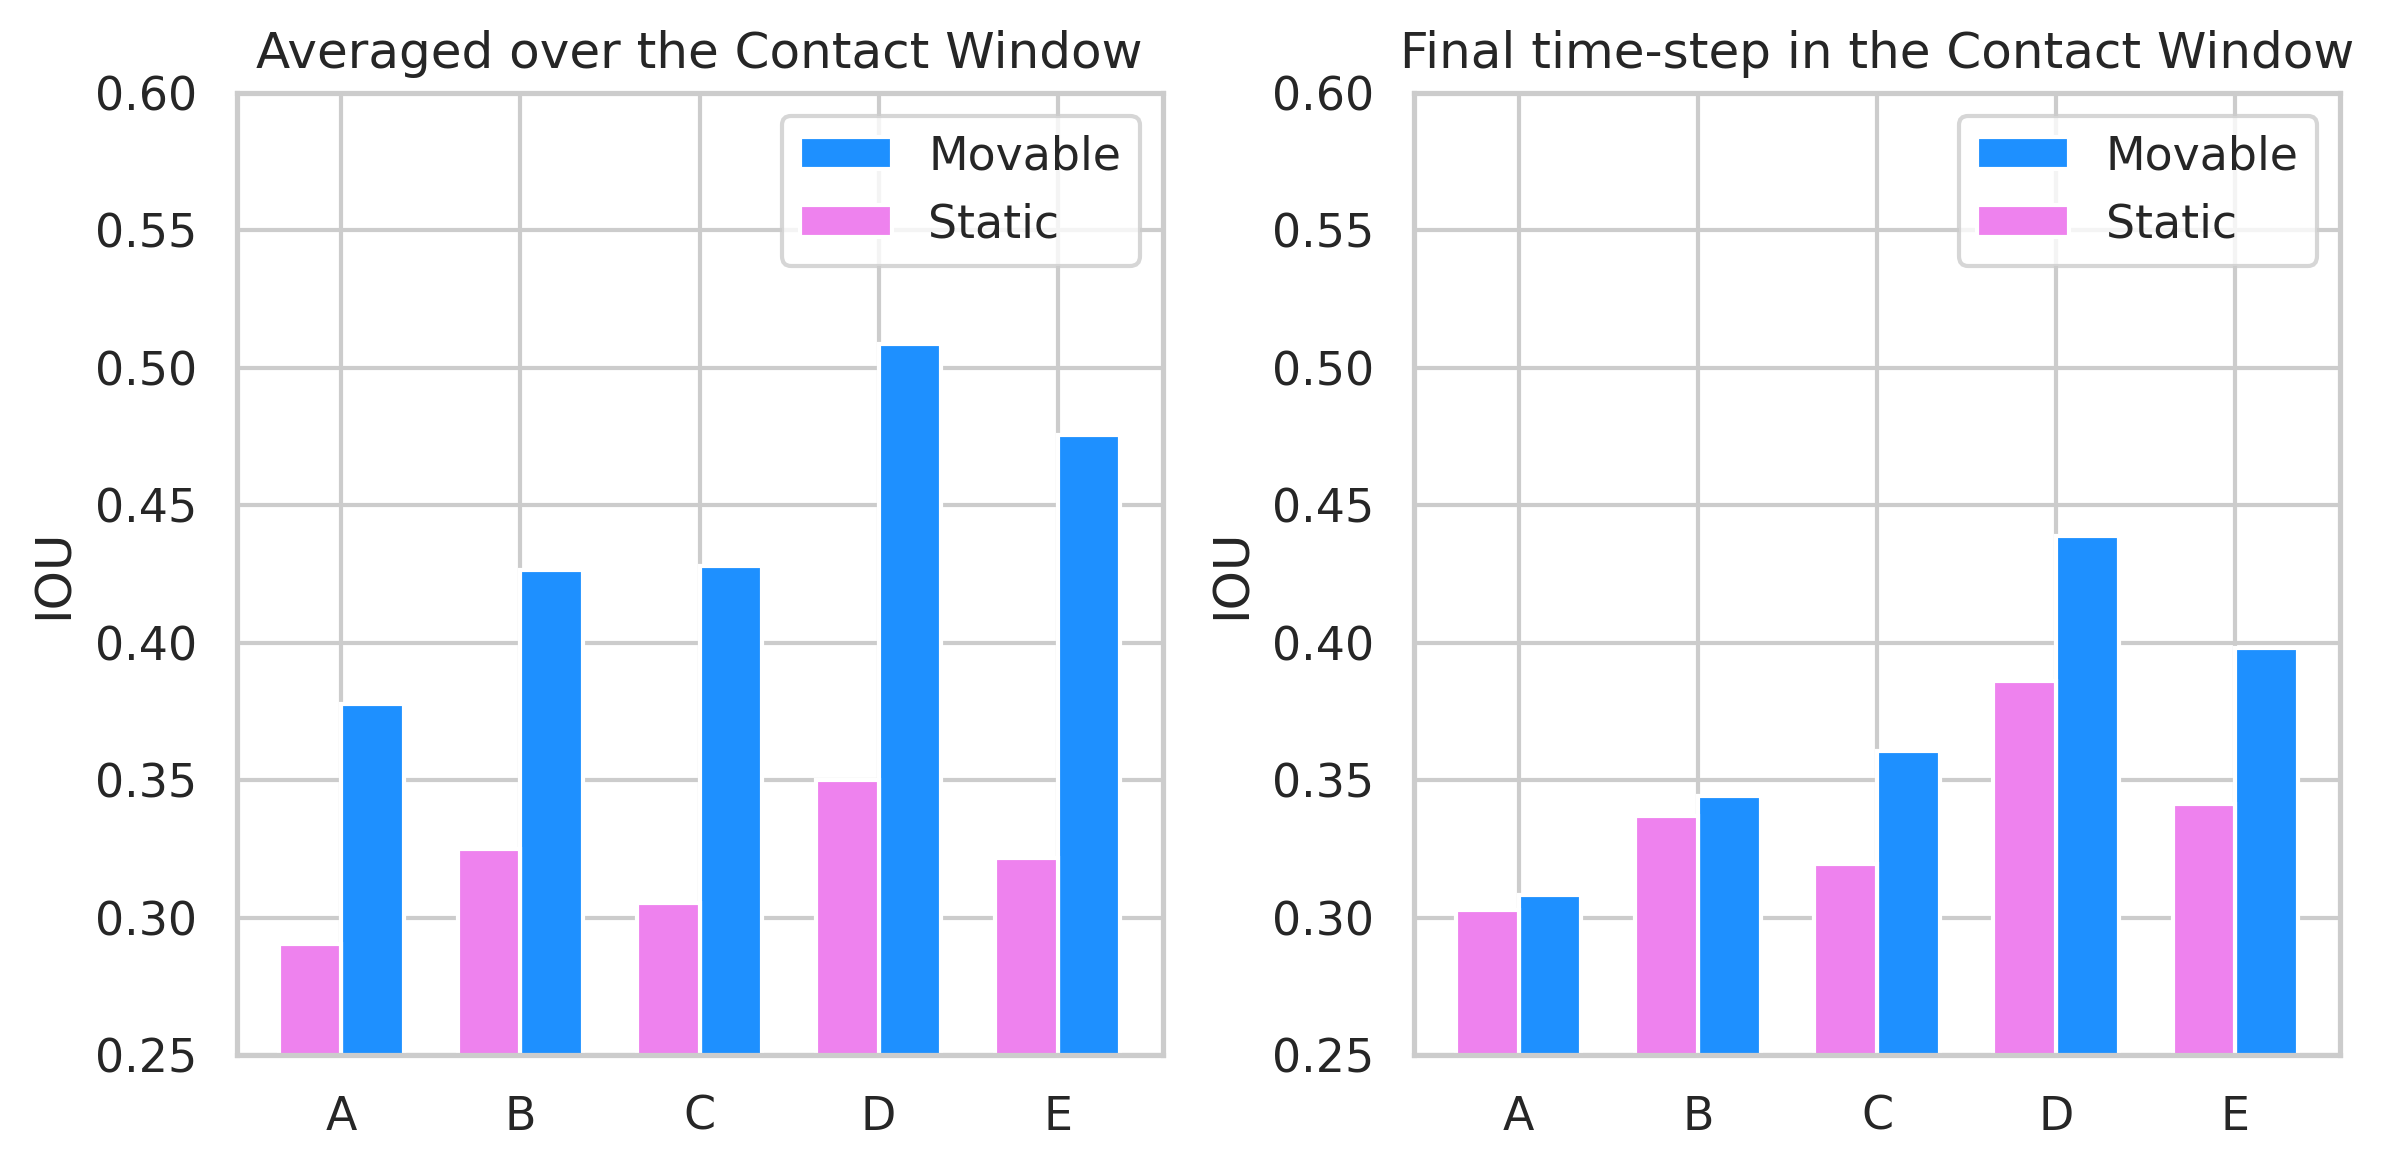

In [5]:
width = 0.35
# Combine all IOU lists into one list of tuples for sorting
mov_iou_data = list(zip(inputs, seq_loss_mov_iou, final_loss_mov_iou, seq_loss_static_iou, final_loss_static_iou))

# Sort the combined list by the sum of sequential and final mov iou
mov_iou_data_sorted = sorted(mov_iou_data, key=lambda x: (x[0]))

# Unpack the sorted data
inputs_sorted, seq_loss_mov_iou_sorted, final_loss_mov_iou_sorted, seq_loss_static_iou_sorted, final_loss_static_iou_sorted = zip(*mov_iou_data_sorted)

# Positions of the bars on the x-axis
ind_sorted = np.arange(len(inputs_sorted))

# Create a mapping for the new labels to the sorted inputs for the legend
new_labels = ['A', 'B', 'C', 'D', 'E']
label_mapping = dict(zip(new_labels, inputs_sorted))

# Create figure and axes
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# 'Sequential' plot on the first axis
axs[0].bar(ind_sorted + width/2, seq_loss_mov_iou_sorted, width, label='Movable', color='dodgerblue')
axs[0].bar(ind_sorted - width/2, seq_loss_static_iou_sorted, width, label='Static', color='violet')
axs[0].set_title('Averaged over the Contact Window')
axs[0].set_ylabel('IOU')
axs[0].set_xticks(ind_sorted)
axs[0].set_xticklabels(new_labels)
axs[0].set_ylim(0.25, 0.6)
axs[0].legend()

# 'Final' plot on the second axis
axs[1].bar(ind_sorted + width/2, final_loss_mov_iou_sorted, width, label='Movable', color='dodgerblue')
axs[1].bar(ind_sorted - width/2, final_loss_static_iou_sorted, width, label='Static', color='violet')
axs[1].set_title('Final time-step in the Contact Window')
axs[1].set_ylabel('IOU')
axs[1].set_xticks(ind_sorted)
axs[1].set_xticklabels(new_labels)
axs[1].set_ylim(0.25, 0.6)
axs[1].legend()

plt.tight_layout()
plt.savefig('test_folder/input_ablation_flat.png')
plt.show()